# Exercise set 6

> The first goal of this exercise is to analyze a fractional factorial design and use **confounding**, **deﬁning contrast(s)**, **generators** and the **resolution**.
>
> In connection with experimental design, we have seen two approaches for checking whether
determined effects are important. These two approaches are based on creating a probability
plot and performing ANOVA. The second goal of this exercise is to use these two approaches.
>
> Finally, we are also going to analyze the results of a more complex experimental design.

## Exercise 6.1

You have recently started a new job in a chocolate bars company. A new and supposedly tasty
chocolate is under development, and the main ingredients that you can vary are:


*  The amount of cocoa ($A$).

*  The number of pecan nuts ($B$).

*  The amount of caramel ($C$).

*  The amount of milk powder ($D$).

*  The amount of sugar ($E$).

*  The amount of vanilla ($F$).

You are tasked with carrying out a maximum of $16$
experiments (limited due to cost
and time constraints) in which the best mixture of
the main ingredients ($A$--$F$)
is found. ("Best" is here determined by a tasting panel of $30$ people.)
For this task, you decide on making a two-level
fractional factorial design.


### 6.1(a)
How many experiments would you have to carry out in a full factorial design?

In [ ]:
# Your code here

#### Your answer to question 6.1(a):
*Double click here*

### 6.1(b)
As stated, you can only carry out $16$ experiments. 
Explain what confounding is and why the set up with
$16$ experiments will lead to confounding.

#### Your answer to question 6.1(b):
*Double click here*

### 6.1(c)
After talking with the chocolate design team, you
decide on the following generators:

*  $E = ABC$.

*  $F = BCD$.

What is a defining contrast, and what are the
defining contrasts in this case?

#### Your answer to question 6.1(c):
*Double click here*

### 6.1(d)
Find the resolution for this design and write out the
short-hand representation of the design on the
form $2^{N-p}_R$. Are any of the main effects
confounded with $2$-factor
interactions? Hint: Consult the summary tables
at [https://www.itl.nist.gov/div898/handbook/pri/section3/pri3347.htm](https://www.itl.nist.gov/div898/handbook/pri/section3/pri3347.htm).

#### Your answer to question 6.1(d):
*Double click here*

### 6.1(e)
Construct the design matrix for the current design but show only the columns for the main effects.

#### Your answer to question 6.1(e):
*Double click here*

### 6.1(f)
Another member of your team suggests doing just $8$ experiments
as this will cut time and cost.
Do you think this is a good idea? Why/why not? What would
the design matrix look like in this case?

In [ ]:
# Your code here

#### Your answer to question 6.1(f):
*Double click here*

## Exercise 6.2

After running a set of experiments, you determine the effects
given in Table 1 for $4$ factors: A, B, C, and D.
Use a normal probability plot to identify the important effects among
the ones listed in this table.


**Table 1:** *Effects determined in a set of experiments. Data for [Exercise 6.2](#Exercise-6.2)*


| A    | B    | C     | D     | AB  | AC   | AD   | BC    | BD   | CD    | ABC   | ACD   | BCD   | ABCD  | ABD   |
|:-----|:-----|:------|:------|:----|:-----|:-----|:------|:-----|:------|:------|:------|:------|:------|:------|
| -8.0 | 24.0 | -2.25 | -5.50 | 1.0 | 0.75 | 0.00 | -1.25 | 4.50 | -0.25 | -0.75 | -0.25 | -0.75 | -0.25 | 0.50  |

<IPython.core.display.Javascript object>


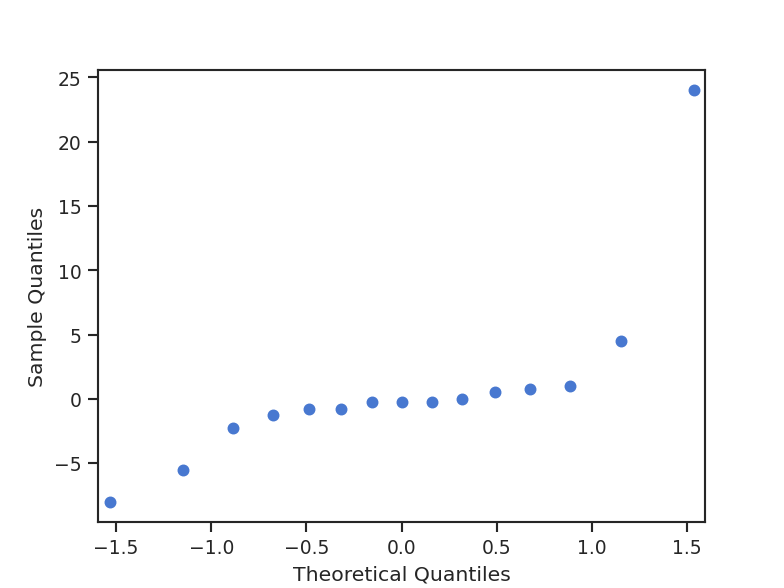

In [21]:
# Example code to get you started:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns  # Styling of plots

%matplotlib notebook
sns.set_theme(style="ticks", context="notebook", palette="muted")

effects = [
    ("A", -8.00),
    ("B", 24.00),
    ("C", -2.25),
    ("D", -5.50),
    ("AB", 1.00),
    ("AC", 0.75),
    ("AD", 0.00),
    ("BC", -1.25),
    ("BD", 4.50),
    ("CD", -0.25),
    ("ABC", -0.75),
    ("ACD", -0.25),
    ("BCD", -0.75),
    ("ABCD", -0.25),
    ("ABD", 0.50),
]

table1 = pd.DataFrame(effects, columns=["factor", "effect"])

# A normal probability plot can be created with statsmodels:
fig, ax = plt.subplots()
plot = sm.ProbPlot(table1["effect"], fit=False)
_ = plot.qqplot(ax=ax)

In [ ]:
# Your code here

#### Your answer to question 6.2:
*Double click here*

## Exercise 6.3

**Only do this exercise if you have time, or did not do [Exercise 6.2](#Exercise-6.2).**

From a $2^2$ factorial experiment replicated three times you have obtained
the data given in Table 2. We use here a short-hand notation
for the $4$ possible combinations of the variables: $(1)$, $a$, $b$, and $ab$.
In this notation, $(1)$ is the experiment where all factors were at their low levels. For the other cases, the absence of a letter means that the corresponding factor was at a low level, and
the presence of a letter indicates that the corresponding factor was at a high level (e.g., "$a$" is the
same as saying that factor A was at the high level and B at the low level).

**Table 2:** *Results from a $2^2$ factorial experiment, repeated $3$ times. Data for [Exercise 6.3](#Exercise-6.3)*

|**Experiment** | **Replicate 1** | **Replicate 2** | **Replicate 2** |
|:---:|:---:|:---:|:---:|
|$(1)$ | $9$  | $10$ | $11$ |
|$a$   | $30$ | $31$ | $29$ |
|$b$   | $19$ | $20$ | $21$ |
|$ab$  | $5$  | $6$  | $4$  |


### 6.3(a)
Calculate the effects (A, B, and AB).

In [ ]:
# Your code here

#### Your answer to question 6.3(a):
*Double click here*

### 6.3(b)
Use ANOVA to investigate which effects are important in this case.
Use a significance level of $\alpha = 0.01$. For
a significance level of $\alpha = 0.01$, the relevant critical
$f$-value is $f_{\alpha=0.01}(1, 8) = 11.259$ with $1$ and $8$ degrees
of freedom. (Note: The numbers in Table 2
are the same as for the example on
page 96 in the textbook.)

In [ ]:
# Your code here

#### Your answer to question 6.3(b):
*Double click here*

## Exercise 6.4

A chemical company is producing the
compound B from compound A in the reaction $\text{A} \to \text{B}$
and the company is running a project to 
maximize the yield of compound B.

The yield for the conversion from A to B is low
at low temperatures. The yield increases at
higher temperatures, but
a competing secondary reaction transforms B into C, an unwanted product.
The secondary reaction, $\text{A} \to \text{B} \to \text{C}$,
is more prominent at higher temperatures, especially when the reaction is allowed to run for a long time.
To determine what combinations of temperature and
reaction time result in the best yield, the company has
carried out a set of experiments. The experimental space and the experimental points
are shown in the figure below (in the Python cell).

Here, the company first
defined a feasibility region (based on chemical knowledge)
and then created a *D*-optimal
design for a cubic model. The experimental results are given
in the Excel file [Data/yield.xls](Data/yield.xls). Use the experimental data to create a cubic model and locate the settings (temperature & time)
that gives the highest yield.

In [22]:
# Example code to get you started:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns  # Styling of plots

%matplotlib notebook
sns.set_theme(style="ticks", context="notebook", palette="muted")

data = pd.read_excel("Data/yield.xls")  # you might have to first do: pip install openpyxl
data.head()

,Run,Time (s),Temperature (K),Yield
0,1,580,528,55.9
1,2,360,529,46.7
2,3,480,525,46.8
3,4,720,523,52.8
4,5,360,545,62.1


<IPython.core.display.Javascript object>


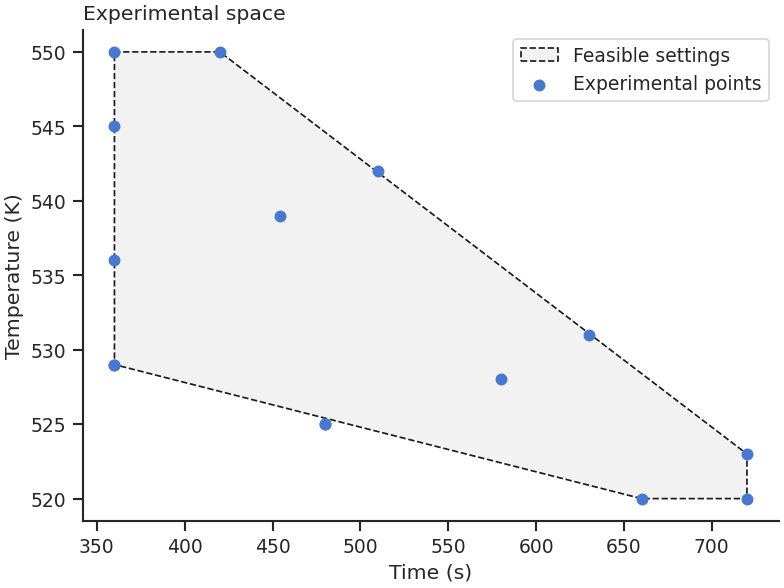

In [23]:
# Plot experimental region
from matplotlib.patches import Polygon
fig, ax = plt.subplots(constrained_layout=True)
ax.set(xlabel="Time (s)", ylabel="Temperature (K)")
points = [
    (660, 520),
    (360, 529),
    (360, 550),
    (420, 550),
    (720, 523),
    (720, 520),
]
region = Polygon(points, edgecolor="k", facecolor="0.95", linestyle="--", label="Feasible settings")
ax.add_artist(region)
ax.scatter(data["Time (s)"], data["Temperature (K)"], label="Experimental points")
ax.legend()
ax.set_title("Experimental space", loc="left")
sns.despine(fig=fig)

To generate all the possible terms for a cubic polynomial can be a hassle (and it is easy to
forget some terms!). Here we would need to have: time, temperature, time², temperature², time × temperature, time³, temperature³, time × temperature² and time² × temperature.

Below is some Python code that will do this for you:

In [26]:
# Here are some hints for creating the model:
# 1) We can transform the variables to -1, 1 with a MinMaxScaler from sklearn.
# 2) We can generate all cubic terms for a polynomial with PolynomialFeatures from sklearn
# 3) We can join these two operations with a so-called pipeline.
# Here is an example:

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

# We do not need to use the scaler here, and we do not need the pipeline.
# The pipeline is convenient if we want to redo this preprocessing on new data
# (for instance, if we want to use the model in the future for predictions).
# The MinMaxScaler is not really needed, but it can make it easier to compare
# regression coefficients.

X_raw = data[["Time (s)", "Temperature (K)"]]
y = data["Yield"]

# Make a pipeline for preprocessing (first scale Time & Temperature, the add polynomial)
preprocess = Pipeline(
    steps=[
        ("minmax-scale", MinMaxScaler(feature_range=(-1, 1))),  # Scale to -1 to 1
        ("cubic", PolynomialFeatures(degree=3, include_bias=True)),  # Add x1, x1^2, x2, x1*x2, ...
        #include_bias = True = add also a constant term
    ]
)
preprocess.fit(X_raw)
# The line above is fitting the pipeline to the data (this sets up the scaler and polynomial transformation).
# This does not apply it yet!

X = pd.DataFrame(
    preprocess.transform(X_raw),  # Transform the data = scale and make the polynomial
    columns=preprocess.get_feature_names_out(),  # Store the variables
)
X

,1,Time (s),Temperature (K),Time (s)^2,Time (s) Temperature (K),Temperature (K)^2,Time (s)^3,Time (s)^2 Temperature (K),Time (s) Temperature (K)^2,Temperature (K)^3
0,1.0,0.222222,-0.466667,0.049383,-0.103704,0.217778,0.010974,-0.023045,0.048395,-0.101630
1,1.0,-1.000000,-0.400000,1.000000,0.400000,0.160000,-1.000000,-0.400000,-0.160000,-0.064000
2,1.0,-0.333333,-0.666667,0.111111,0.222222,0.444444,-0.037037,-0.074074,-0.148148,-0.296296
3,1.0,1.000000,-0.800000,1.000000,-0.800000,0.640000,1.000000,-0.800000,0.640000,-0.512000
4,1.0,-1.000000,0.666667,1.000000,-0.666667,0.444444,-1.000000,0.666667,-0.444444,0.296296
5,1.0,0.666667,-1.000000,0.444444,-0.666667,1.000000,0.296296,-0.444444,0.666667,-1.000000
6,1.0,-0.333333,-0.666667,0.111111,0.222222,0.444444,-0.037037,-0.074074,-0.148148,-0.296296
7,1.0,-0.666667,1.000000,0.444444,-0.666667,1.000000,-0.296296,0.444444,-0.666667,1.000000
8,1.0,-1.000000,0.066667,1.000000,-0.066667,0.004444,-1.000000,0.066667,-0.004444,0.000296
9,1.0,-0.477778,0.266667,0.228272,-0.127407,0.071111,-0.109063,0.060872,-0.033975,0.018963


In [27]:
# Your code here: fit the polynomial and locate the maximum (you can do this graphically)

#### Your answer to question 6.4: What settings gives you the highest yield?
*Double click here*